In [64]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/stroke_prediction_dataset.csv')


In [65]:
print(df.columns)


Index(['id', 'patient_name', 'age', 'gender', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'alcohol_intake', 'physical_activity',
       'stroke_history', 'family_history', 'dietary_habits', 'stress_levels',
       'bp_levels', 'cholesterol_levels', 'symptoms', 'diagnosis'],
      dtype='object')


In [66]:
print(df['diagnosis'].unique())


['Stroke' 'No Stroke']


In [67]:
df.isnull().sum()

,0
id,0
patient_name,0
age,0
gender,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,0
avg_glucose_level,0


In [68]:
# Filter rows where diagnosis == 1
filtered_df = df[df['diagnosis'] == 'Stroke']

# Select the specified features
selected_features = [
    'id', 'age', 'gender', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'alcohol_intake',
    'physical_activity', 'stroke_history', 'family_history'
]

# Create a new dataset with only selected features
new_dataset = filtered_df[selected_features]

# Save the new dataset to a CSV file
new_dataset.to_csv('filtered_selected_features_dataset.csv', index=False)

print("Filtered and selected dataset saved as 'filtered_selected_features_dataset.csv'")



Filtered and selected dataset saved as 'filtered_selected_features_dataset.csv'


In [69]:
# Convert gender to numeric: Male -> 1, Female -> 0
new_dataset.loc[:,'gender'] = new_dataset['gender'].map({'Male': 1, 'Female': 0}).astype('float')



In [73]:
# Convert gender to numeric: Married -> 1, Single,Divorced -> 0
new_dataset.loc[:,'ever_married'] = new_dataset['ever_married'].map({'Married': 1, 'Single': 0,'Divorced':0}).astype('float')


In [72]:
print(df['work_type'].unique())

['Self-employed' 'Never Worked' 'Private' 'Government Job']


In [74]:
new_dataset.loc[:,'work_type'] = new_dataset['work_type'].map({'Private': 0.0, 'Self-employed': 1.0,'Government Job':2.0,'Never Worked':3.0}).astype('float')

In [75]:
print(df['smoking_status'].unique())

['Non-smoker' 'Formerly Smoked' 'Currently Smokes']


In [76]:
new_dataset.loc[:,'smoking_status'] = new_dataset['smoking_status'].map({'Non-smoker': 0.0,'Formerly Smoked':1.0,'Currently Smokes':2.0}).astype('float')

In [77]:
print(df['alcohol_intake'].unique())

['Social Drinker' 'Never' 'Rarely' 'Frequent Drinker']


In [78]:
new_dataset.loc[:,'alcohol_intake'] = new_dataset['alcohol_intake'].map({'Never': 0.0,'Rarely':1.0,'Social Drinker':1.0,'Frequent Drinker':2.0}).astype('float')

In [79]:
print(df['physical_activity'].unique())

['Moderate' 'Low' 'High']


In [80]:
new_dataset.loc[:,'physical_activity'] = new_dataset['physical_activity'].map({'Low': 0.0,'Moderate':1.0,'High':2.0}).astype('float')

In [81]:
print(df['stroke_history'].unique())

[0 1]


In [82]:
print(df['family_history'].unique())

['Yes' 'No']


In [83]:
new_dataset.loc[:,'family_history'] = new_dataset['family_history'].map({'Yes': 1.0,'No':0.0})

In [84]:
new_dataset.isnull().sum()

,0
id,0
age,0
gender,0
hypertension,0
heart_disease,0
ever_married,7468
work_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [86]:
new_dataset.to_csv('preprocessed_dataset.csv',index=False)

In [87]:
!pip install scikit-learn==1.2.1

In [88]:
!pip install numpy==1.23.5

In [89]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Load your dataset
df = pd.read_csv("/content/preprocessed_dataset.csv")

# --- STEP 2: Define stroke risk logic ---
def assign_stroke_risk(row):
    if (
        row['age'] > 60 or
        row['hypertension'] == 1 or
        row['heart_disease'] == 1 or
        row['avg_glucose_level'] > 180 or
        row['bmi'] > 30 or
        row['stroke_history'] == 1

    ):
        return 'high'
    elif (
        40 < row['age'] <= 60 or
        120 < row['avg_glucose_level'] <= 180 or
        25 < row['bmi'] <= 30 or
        row['family_history'] == 1
    ):
        return 'moderate'
    else:
        return 'low'

df['stroke_risk'] = df.apply(assign_stroke_risk, axis=1)

# --- STEP 3: Balance the dataset ---

# Split the dataset by class
df_high = df[df['stroke_risk'] == 'high']
df_moderate = df[df['stroke_risk'] == 'moderate']
df_low = df[df['stroke_risk'] == 'low']

# Find the size of the largest class
max_count = max(len(df_high), len(df_moderate), len(df_low))

# Upsample the smaller classes
df_high_bal = resample(df_high, replace=True, n_samples=max_count, random_state=42)
df_mod_bal = resample(df_moderate, replace=True, n_samples=max_count, random_state=42)
df_low_bal = resample(df_low, replace=True, n_samples=max_count, random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_high_bal, df_mod_bal, df_low_bal])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# --- STEP 4: Save the balanced dataset ---
df_balanced.to_csv("balanced_stroke_risk_dataset.csv", index=False)

print("✅ Balanced dataset saved as 'balanced_stroke_risk_dataset.csv'")
print(df_balanced['stroke_risk'].value_counts())


✅ Balanced dataset saved as 'balanced_stroke_risk_dataset.csv'
stroke_risk
moderate    7036
low         7036
high        7036
Name: count, dtype: int64


In [90]:
!pip install tensorflow==2.12.0

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# --- STEP 1: Load the dataset ---
df = pd.read_csv("/content/balanced_stroke_risk_dataset.csv")

df.loc[:,'stroke_risk'] = df['stroke_risk'].map({'low': 0.0,'moderate':1.0,'high':2.0}).astype('float')

In [92]:
df.isnull().sum()

,0
id,0
age,0
gender,0
hypertension,0
heart_disease,0
ever_married,21108
work_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Import accuracy_score here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ... (rest of your code remains the same) ...
# Load and prepare data
df = pd.read_csv("/content/balanced_stroke_risk_dataset.csv")
df['stroke_risk'] = df['stroke_risk'].map({'low': 0, 'moderate': 1, 'high': 2})

# Feature engineering - create interaction terms
df['age_glucose'] = df['age'] * df['avg_glucose_level']
df['bmi_hypertension'] = df['bmi'] * df['hypertension']

# Select features
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
        'bmi', 'stroke_history', 'family_history', 'age_glucose', 'bmi_hypertension']]
y = df['stroke_risk']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features - try both Standard and MinMax scaling to see which works better
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Improved Model Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train_cat,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluation
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# Detailed metrics
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/100
423/423 [==============================] - 2s 2ms/step - loss: 0.2180 - accuracy: 0.9205 - val_loss: 0.0944 - val_accuracy: 0.9701
Epoch 2/100
423/423 [==============================] - 1s 2ms/step - loss: 0.1302 - accuracy: 0.9545 - val_loss: 0.0727 - val_accuracy: 0.9704
Epoch 3/100
423/423 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9602 - val_loss: 0.0631 - val_accuracy: 0.9757
Epoch 4/100
423/423 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9634 - val_loss: 0.0870 - val_accuracy: 0.9686
Epoch 5/100
423/423 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9669 - val_loss: 0.0564 - val_accuracy: 0.9775
Epoch 6/100
423/423 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9694 - val_loss: 0.0504 - val_accuracy: 0.9822
Epoch 7/100
423/423 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9691 - val_loss: 0.0684 - val_accuracy: 0.9742

In [105]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['low', 'moderate', 'high']))


Classification Report:
              precision    recall  f1-score   support

         low       1.00      1.00      1.00      1407
    moderate       1.00      1.00      1.00      1407
        high       1.00      1.00      1.00      1408

    accuracy                           1.00      4222
   macro avg       1.00      1.00      1.00      4222
weighted avg       1.00      1.00      1.00      4222



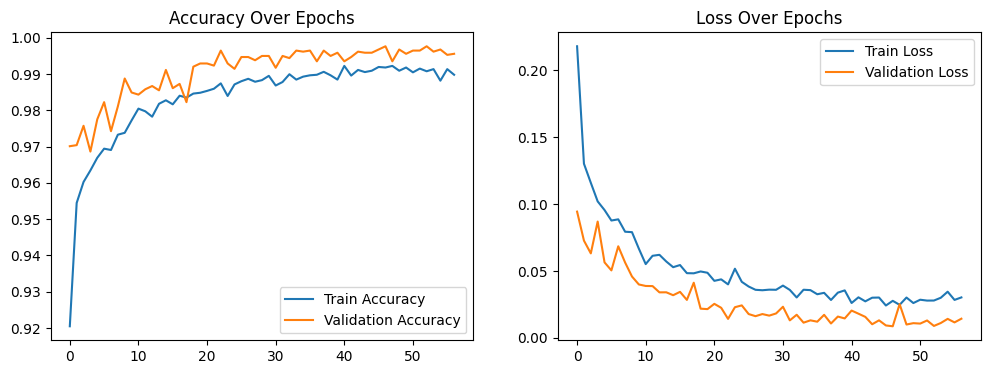

132/132 [==============================] - 0s 883us/step


<ipython-input-106-3b9ed68059f6>:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])


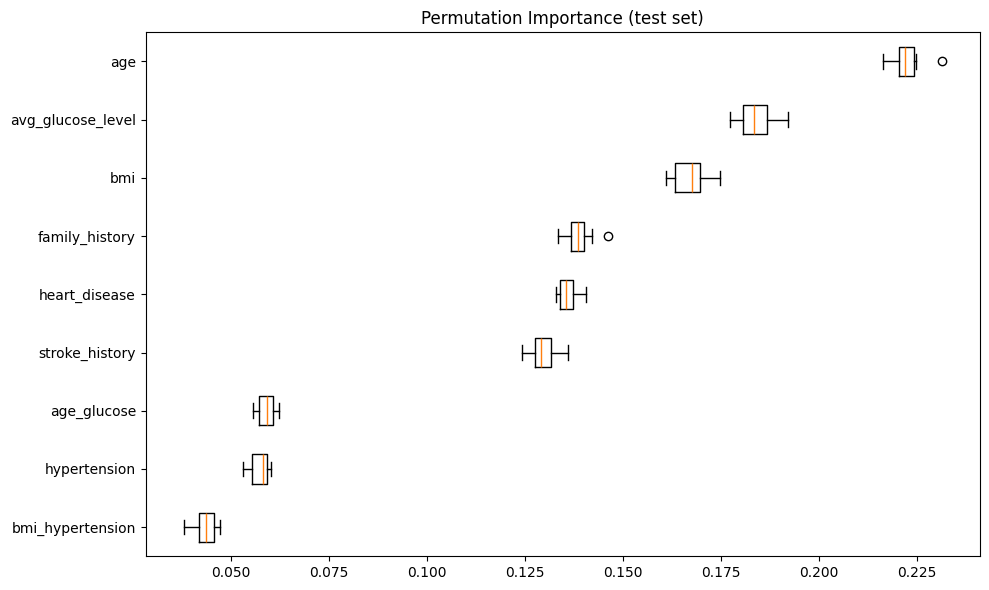

In [106]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Feature importance analysis (permutation importance)
from sklearn.inspection import permutation_importance

# Define a custom scoring function for your Keras model
def custom_scoring(estimator, X, y):
    y_pred = estimator.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
    return accuracy_score(y, y_pred_classes)   # Use accuracy as the scoring metric

# Now use the custom scoring function in permutation_importance
result = permutation_importance(model, X_test_scaled, y_test, scoring=custom_scoring, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()

In [107]:
# Save the model
model.save("/content/stroke_risk_model.h5")
print("Model saved as stroke_risk_model.h5")


Model saved as stroke_risk_model.h5


In [108]:
import joblib
joblib.dump(scaler, "scaler.save")
print("Scaler saved as scaler.save")


Scaler saved as scaler.save


In [109]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load model and scaler
model = load_model("stroke_risk_model.h5")
scaler = joblib.load("scaler.save")

# Input values
# age, hypertension, heart_disease, avg_glucose_level, bmi, stroke_history, family_history
input_data = np.array([[60, 1, 0, 150, 28.5, 0, 1]])

# Create engineered features
age_glucose = input_data[0][0] * input_data[0][3]  # age * avg_glucose_level
bmi_hypertension = input_data[0][4] * input_data[0][1]  # bmi * hypertension

# Append engineered features
final_input = np.hstack([input_data, [[age_glucose, bmi_hypertension]]])

# Scale
scaled_input = scaler.transform(final_input)

# Predict
prediction = model.predict(scaled_input)
predicted_class = np.argmax(prediction)

# Class mapping
risk_mapping = {0: "Low", 1: "Moderate", 2: "High"}
print(f"Predicted Stroke Risk: {risk_mapping[predicted_class]}")


1/1 [==============================] - 0s 70ms/step
Predicted Stroke Risk: High


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [110]:
# Input for Low Risk case
# age, hypertension, heart_disease, avg_glucose_level, bmi, stroke_history, family_history
input_low = np.array([[35, 0, 0, 95, 22.5, 0, 0]])

# Engineered features
age_glucose_low = input_low[0][0] * input_low[0][3]
bmi_hyper_low = input_low[0][4] * input_low[0][1]

# Final input
final_input_low = np.hstack([input_low, [[age_glucose_low, bmi_hyper_low]]])
scaled_low = scaler.transform(final_input_low)

# Predict
pred_low = model.predict(scaled_low)
predicted_class_low = np.argmax(pred_low)
print("Low Risk Prediction:", ["Low", "Moderate", "High"][predicted_class_low])


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
Low Risk Prediction: Low


In [111]:
# Input for Moderate Risk case
input_mod = np.array([[55, 1, 0, 140, 26.0, 0, 1]])

# Engineered features
age_glucose_mod = input_mod[0][0] * input_mod[0][3]
bmi_hyper_mod = input_mod[0][4] * input_mod[0][1]

# Final input
final_input_mod = np.hstack([input_mod, [[age_glucose_mod, bmi_hyper_mod]]])
scaled_mod = scaler.transform(final_input_mod)

# Predict
pred_mod = model.predict(scaled_mod)
predicted_class_mod = np.argmax(pred_mod)
print("Moderate Risk Prediction:", ["Low", "Moderate", "High"][predicted_class_mod])


1/1 [==============================] - 0s 24ms/step
Moderate Risk Prediction: High


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


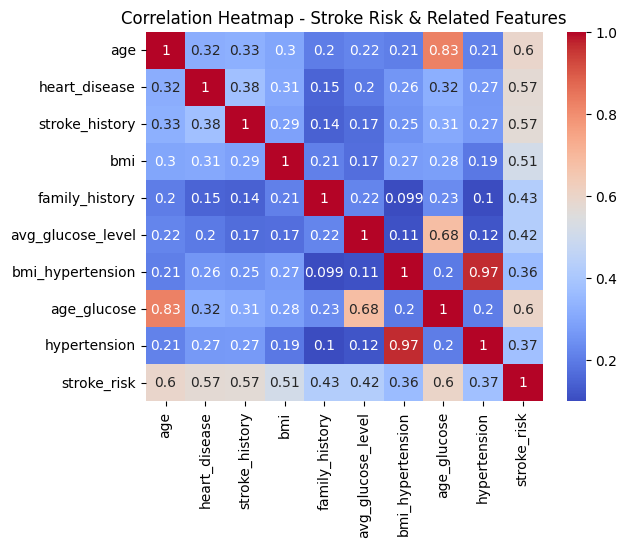

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Focus only on top features
top_features = ['age', 'heart_disease', 'stroke_history', 'bmi', 'family_history', 'avg_glucose_level', 'bmi_hypertension', 'age_glucose', 'hypertension', 'stroke_risk']
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Stroke Risk & Related Features")
plt.show()


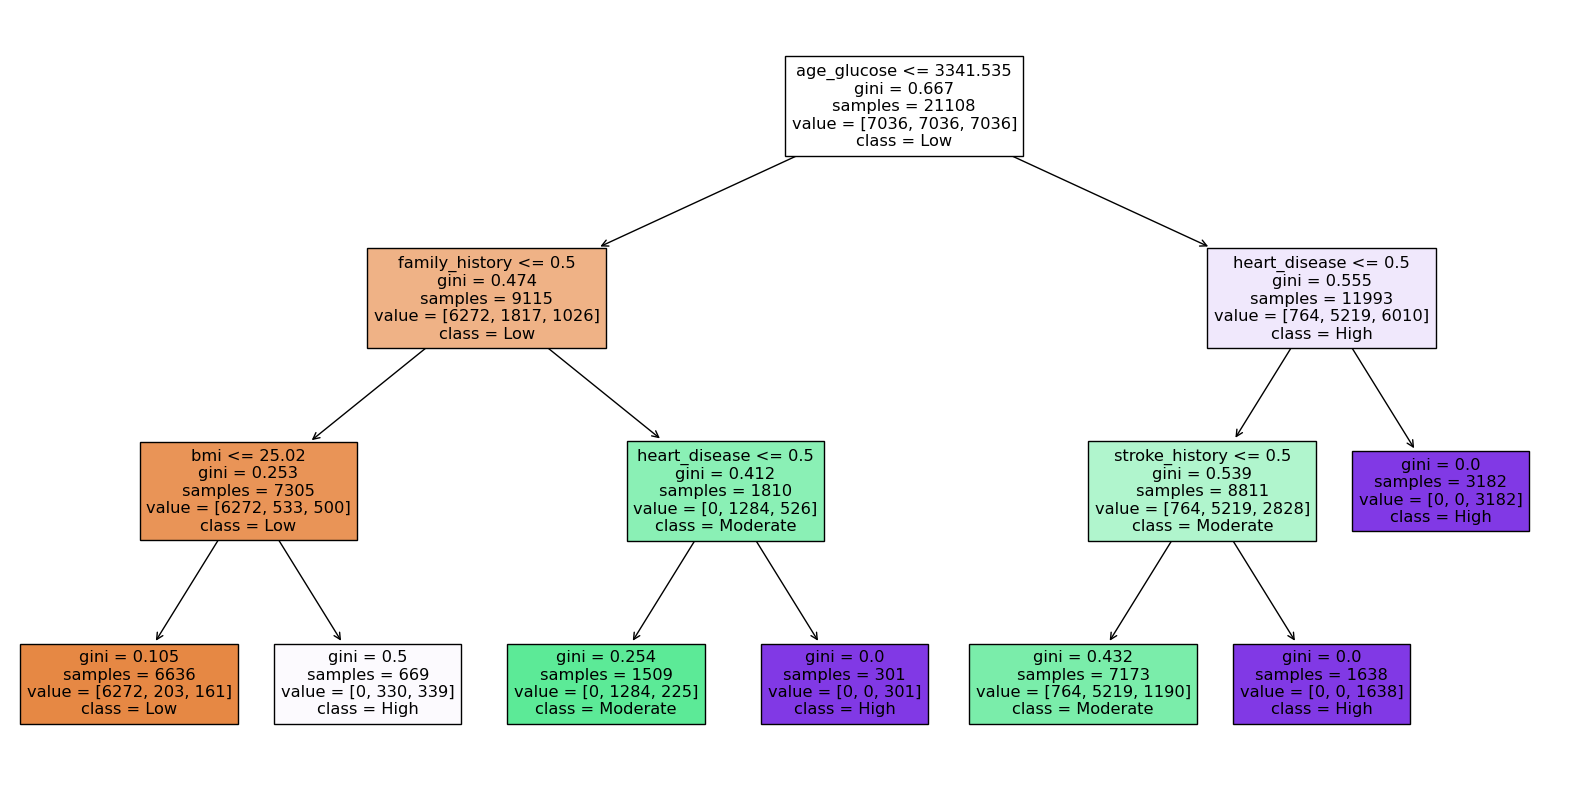

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df[top_features[:-1]]  # exclude stroke_risk
y = df['stroke_risk']

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Low', 'Moderate', 'High'], filled=True)
plt.show()
